# Анализ бизнес показателей

## Описание проекта

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания-разработчик развлекательного приложения Procrastinate Pro+ терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы

Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов

На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

## Описание данных

В нашем распоряжении три датасета:
- visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
- orders_info_short.csv — информацию о покупках, 
- costs_info_short.csv — информацию о расходах на рекламу

Структура visits_info_short.csv
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии

Структура orders_info_short.csv
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа

Структура costs_info_short.csv
- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию

## Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits, orders, costs = (pd.read_csv(r'D:\Yandex_Practikum\Project_BI\visits.csv'),
    pd.read_csv(r'D:\Yandex_Practikum\Project_BI\orders_info_short.csv'),
    pd.read_csv(r'D:\Yandex_Practikum\Project_BI\costs_info_short.csv'))
except:
    visits, orders, costs = (pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv'))

display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


## Предобработка данных

### Приведем заголовки столбцов в датасетах к нижнему регистру

In [3]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
    
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

costs.columns = map(str.lower, costs.columns)

### Проверим тип данных, дубликаты и пропуски

In [4]:
print('Типы данных')
print(visits.info())
print(' ')
print('Дубликаты:', visits.duplicated().sum())
print('Пропуски:', visits.isna().sum())

Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
 
Дубликаты: 0
Пропуски: user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64


In [5]:
print('Типы данных')
print(orders.info())
print(' ')
print('Дубликаты:', orders.duplicated().sum())
print('Пропуски:', orders.isna().sum())

Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
 
Дубликаты: 0
Пропуски: user_id     0
event_dt    0
revenue     0
dtype: int64


In [6]:
print('Типы данных')
print(costs.info())
print(' ')
print('Дубликаты:', costs.duplicated().sum())
print('Пропуски:', costs.isna().sum())

Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
 
Дубликаты: 0
Пропуски: dt         0
channel    0
costs      0
dtype: int64


### Пропусков и дубликатов нет. Типы данных в колонках с датой преобразуем в тип datetime

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Проведем исследовательский анализ данных. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии, а также функции для их визуализации

In [8]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [10]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [12]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [13]:
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Создадим профили пользователей с помощью функции get_profiles()

In [16]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
# определим минимальную и максимальную даты исследования
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print(min_analysis_date)
print(max_analysis_date)

2019-05-01
2019-10-27


#### Установим момент и горизонт анализа данных

In [18]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Смотрим распределение пользователей по каналу, региону и устройству входа

In [19]:
# Таблица общего количества и доля платящих пользователей по странам

(profiles
        .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
        .reset_index()
        .rename(columns={'count': 'all_users', 'sum': 'paying_sers', 'mean':'ratio'})
        .droplevel(1, axis=1)
        .sort_values(by='ratio', ascending=False)
        .style.format({'ratio':'{:.2%}'})
)

,region,all_users,paying_sers,ratio
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


<div class="alert alert-info">
    
- наибольшая доля (около 65%) пользователей приложения из США, европейские регионы имеют примерно равные доли
- при объеме пользователей в 100 000 из США соотношение платящих очень маленькое, посмотрим в дальнейших шагах сколько компания тратит на привлечение этой сотни.
    
</div>

In [20]:
# Таблица общего количества и доля платящих пользователей по каналам привлечения

(profiles
        .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
        .reset_index()
        .rename(columns={'count': 'all_users', 'sum': 'paying_sers', 'mean':'ratio'})
        .droplevel(1, axis=1)
        .sort_values(by='ratio', ascending=False)
        .style.format({'ratio':'{:.2%}'})
)

,channel,all_users,paying_sers,ratio
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


<div class="alert alert-info">
    
- более 55% трафика - органический, также около 10% платящих пользователей приходится на данный бесплатный канал привлечения. Однако, при таких значительных объемах органического трафика, необходимо работать над повышением конверсии с данного канала. Малая доля конверсии говорит о приходе через поиск нерелевантных пользователей и нужно работать над семантикой продукта компании в сети на максимальное соответствие описаний, заголовков и тегов. В т.ч. проанализировать и удалить контент, отвечающий на неэффективные запросы.
- примерно половину платного трафика приходится на каналы TipTop и FaceBoom, их конверсия в большей степени определяет уровень окупаемости затрат на рекламу. Обратим на них более пристальное внимание при дальнейшем анализе
- в общем по всем каналам привлечения по конверсии показатели относительно низкие, потенциал повышения значительный
    
</div>

In [21]:
(profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').rename(columns={'acquisition_cost': 'acquisition_mean'}).sort_values(by='acquisition_mean', ascending=False))

,acquisition_mean
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


<div class="alert alert-info">
    
- средние затраты на каналах TipTop, FaceBoom, AdNonSense превышают средний доход от пользователя, пришедшего с этого канала. У TipTop расходы превышают почти в 3 раза.
   
</div>

In [22]:
# Таблица общего количества и доля платящих пользователей по устройствам входа

(profiles
        .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
        .reset_index()
        .rename(columns={'count': 'all_users', 'sum': 'paying_sers', 'mean':'ratio'})
        .droplevel(1, axis=1)
        .sort_values(by='ratio', ascending=False)
        .style.format({'ratio':'{:.2%}'})
)

,device,all_users,paying_sers,ratio
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


<div class="alert alert-info">
    
- Больше всего пользователи используют для входа в приложение Iphone 
- Остальные пользователи примерно в равном количестве используют Android, PC и Mac
- Показатели конверсии на всех устройствах примерно одинаковы
    
</div>

### Проанализируем маркетинговые расходы в разбивке по платным каналам

Revenue: 215962.88
Costs: 105497.30000000002
Profit: 110465.57999999999


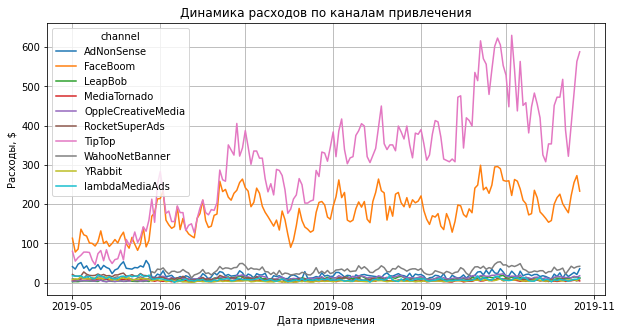

In [23]:
# Общая сумма и соотношение доходов и расходов

print('Revenue:', orders['revenue'].sum())
print('Costs:', costs['costs'].sum())
print('Profit:', orders['revenue'].sum() - costs['costs'].sum())

# строим график динамики расходов по каналам привлечения

costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по каналам привлечения')
plt.show()

<div class="alert alert-info">
    
- Каналы TipTop и FaceBoom показывают значительное увеличение расходов. У TipTop за последние полгода рост в 4-6 раз, у FaceBoom - в 2-3 раза.
- остальные каналы находятся в зоне окупаемости, с прибыльностью от 50%.
    
С учетом таблицы и графика затрат по каналам, где рост у TipTop и FaceBoom наблюдается с июня 2019 года, возможно был неверно выбран способ оплаты конверсии трафика, который постоянно увеличивал бюджет за действие, а также приводил некачественных пользователей.
    
</div>

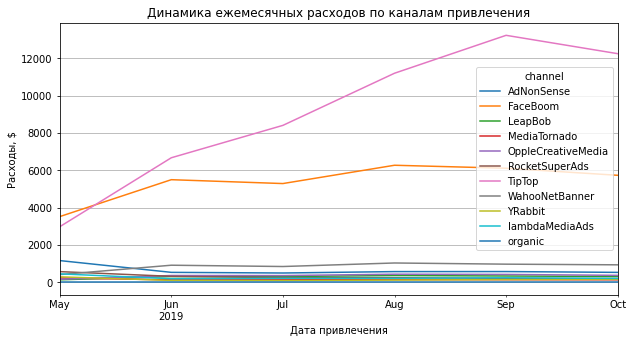

In [24]:
# строим график ежемесячных расходов по каналам привлечения

profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика ежемесячных расходов по каналам привлечения')
plt.show()

<div class="alert alert-info">
    
- TipTop за последние полгода сумма расходов увеличилась с 3000 до 12-13000 $, FaceBoom - с 3500 до 6000 $
- По остальным каналам сумма расходов не превышает 10000$. Незначительно выделяется лишь канал WahooNetBanner с ростом расходов с мая по июнь 2019 года, после уровень стабилизировался.
    
</div>

### Для начала изучим данные по конверсии с разбивкой

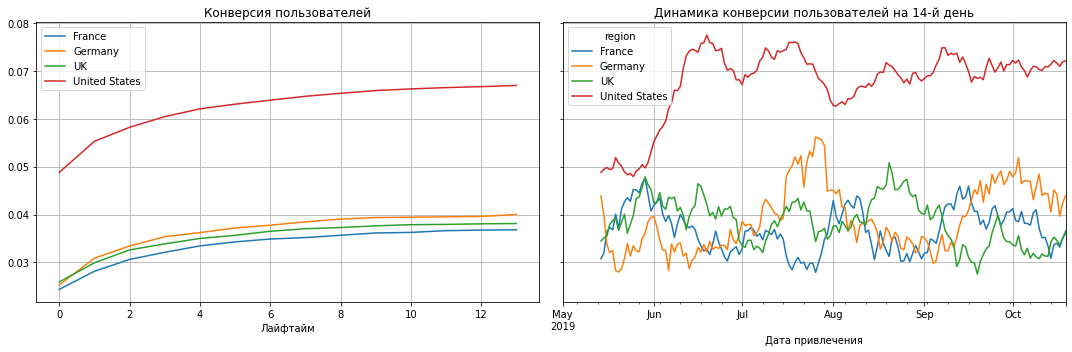

In [25]:
dimensions=['region'] # по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<div class="alert alert-info">
    
- Самые высокие показатели конверсии в США, европейские регионы примерно в 2 раза ниже. Общий тренд для всех восходящий.
- по динамике конверсии на 14-ый день после привлечения картина в целом такая же. Пользователи США покупают в первые 2 недели чаще с июня 2019 года. 
    
</div>

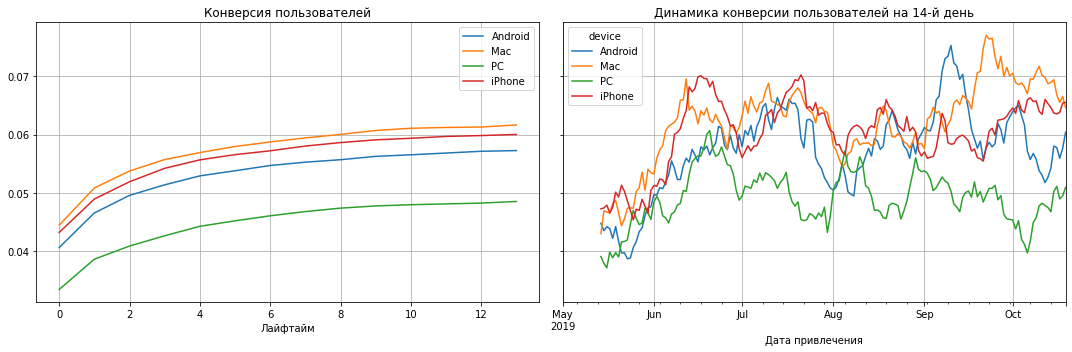

In [26]:
dimensions=['device'] # по устройствам входа

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<div class="alert alert-info">
    
- Наибольшая конверсия у пользователей Mac и Iphone, чуть меньше у Android и самые низкие показатели у PC. При этом общий тренд также для всех восходящий
- Динамика конверсии на 14-й день соответствует общим трендам. Отличается более низкой конверсией платформа PC  
    
</div>

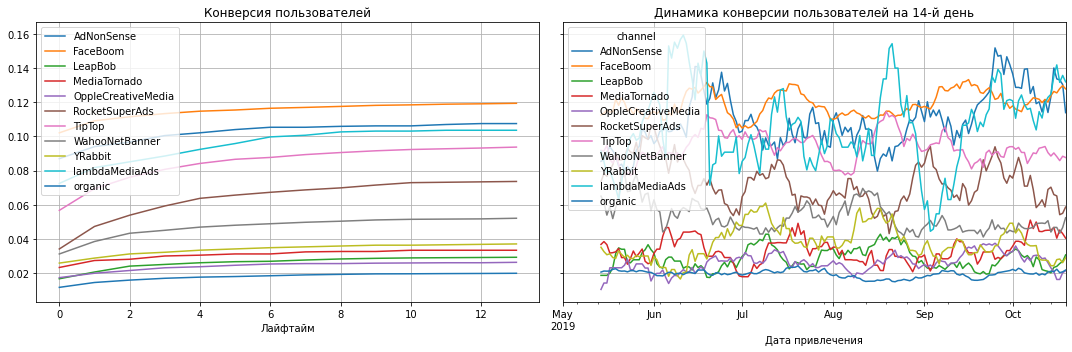

In [27]:
dimensions=['channel'] # по каналу привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<div class="alert alert-info">
    
- по каналу FaceBoom конверсия имеет наилучший показатель, далее идут AdNonSense и lambdaMediaAds.  
- ранее упомянутый TipTop, имеющий значительную долю рекламного бюджета, показывает результаты хуже чем у топ-3. Однако, учитывая количество пользователей, он приносит больше пользователей чем AdNonSense и lambdaMediaAds. Последние приносят меньше всего пользователей и показывают лучшую эффективность.
- также и органический трафик, даже при самом низком показателе конверсии, с учетом объема трафика является одним из наиболее эффективных каналов.  
    
</div>

### Посчитаем затраты и окупаемость на рекламу с помощью показателей LTV и ROI, а также показатели удержания с признаком платящий\неплатящий

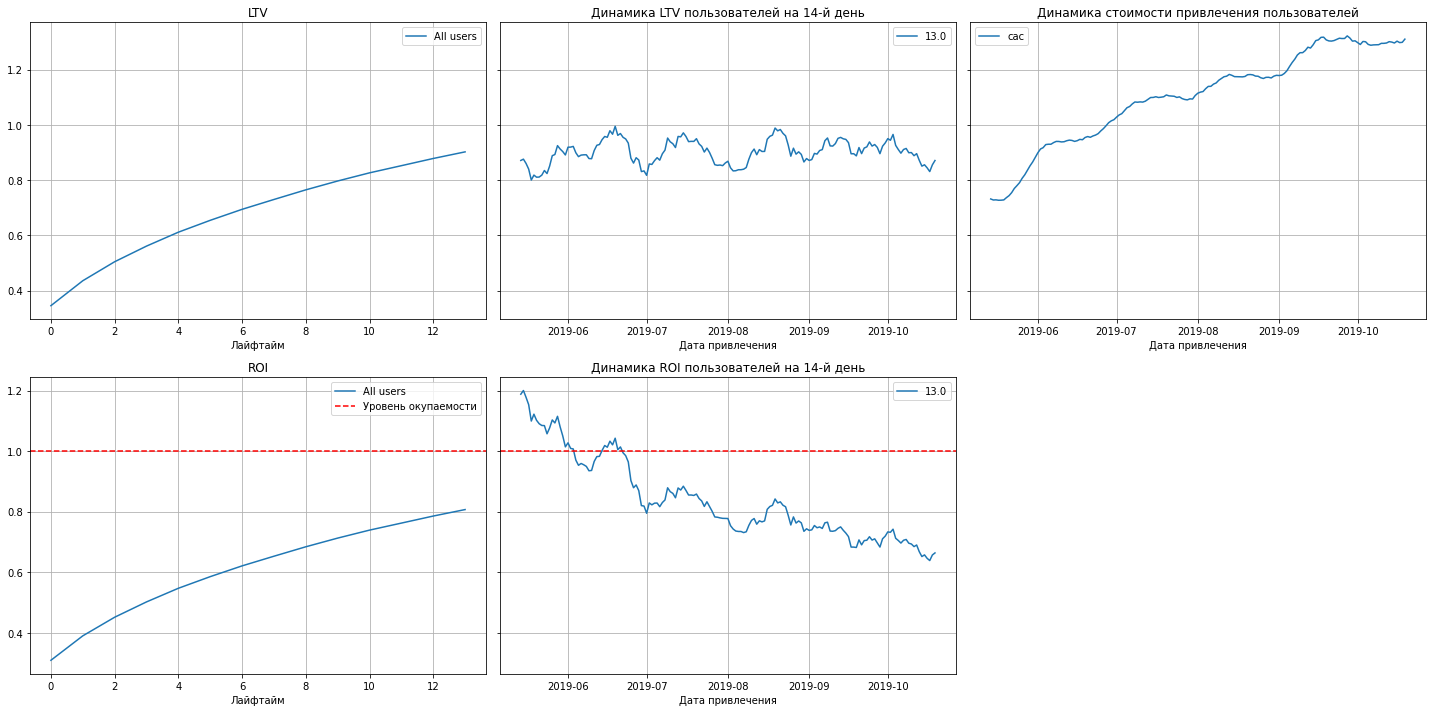

In [28]:
# исключим пользователей из органического трафика
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-info">
    
- общий показатель и динамика на 14-й день LTV достаточно стабильны. Значит, дело не в ухудшении качества пользователей. 
- Реклама практически не окупается. ROI к концу второй недели — достигает 98-99%. Однако динамика ROI за весь период показывает тренд на снижение
- показатель CAC стабильно растет. С июля 2019 года показатель превысил уровень окупаемости и пошел в убыток. Значит рекламные бюджеты постоянно увеличиваются, и снижает окупаемость инвестиций.
    
Следовательно дело в значительном увеличении стоимости привлечения пользователя и рекламный бюджет съедает всю прибыль, а также вероятней всего при увеличении количества пострадало качество, приходящих пользователей. Выясним где наблюдается рост расходов. 
    
</div>

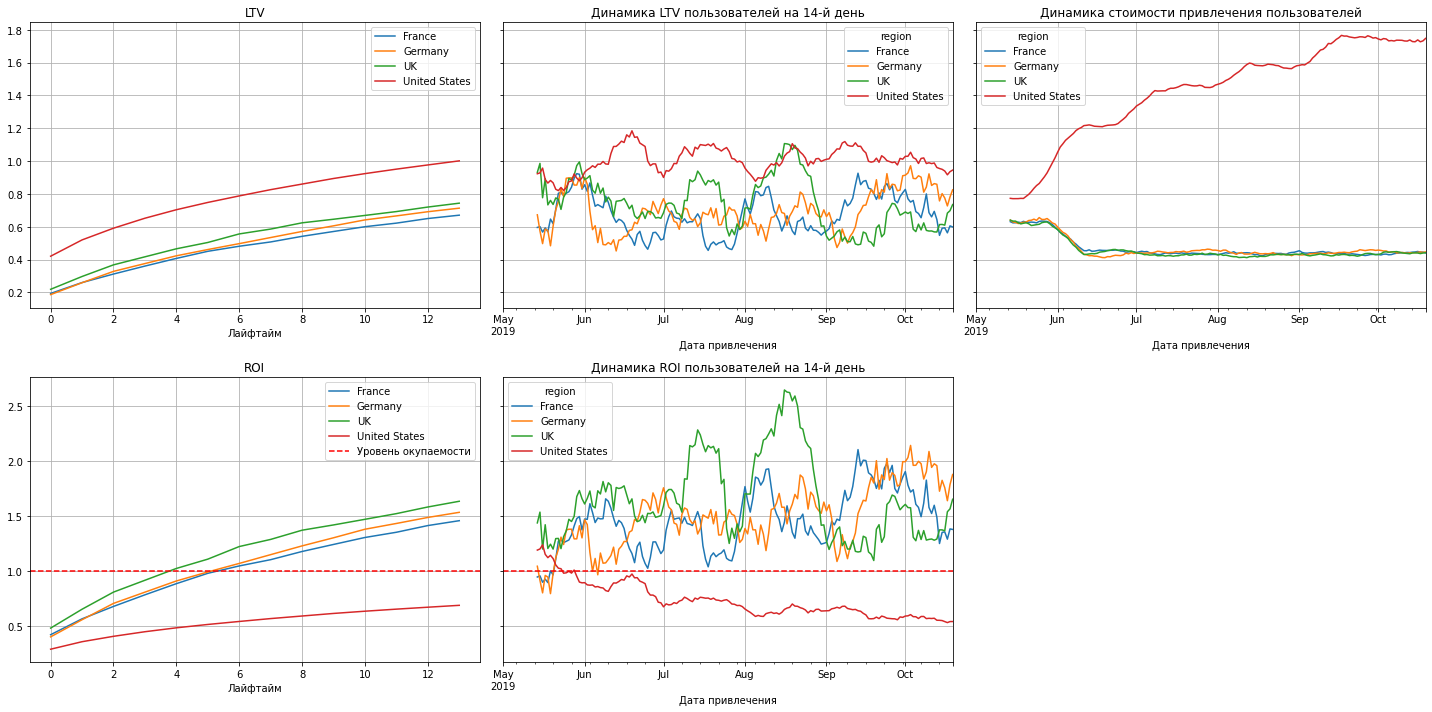

In [29]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-info">
    
- В европейских регионах показатели стабильны и реклама окупается почти в два раза 
- А в США наблюдается значительный рост стоимости привлечения и реклама не достигает окупаемости. Учитывая 65% долю пользователей из США, это огромное влияние на рентабельность бизнеса. Американская когорта пользователей съедает львиную долю рекламного бюджета и отличается крайне низкой эффективностью
    
</div>

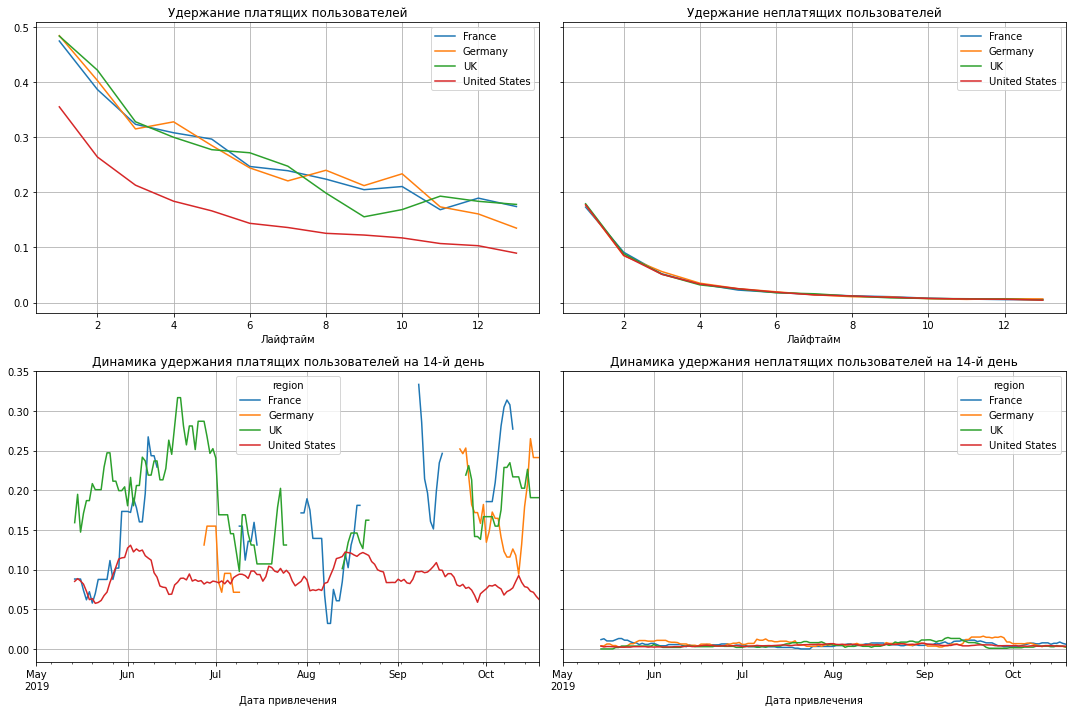

In [30]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-info">
    
- В европейских регионах показатели удержания приемлемые 
- В США показатели значительно ниже, чем в европейских регионах. На них потратили кучу денег, а они еще и убегают чаще всех в первые недели.
    
</div>

#### Cмотрим окупаемость с разбивкой по источникам привлечения

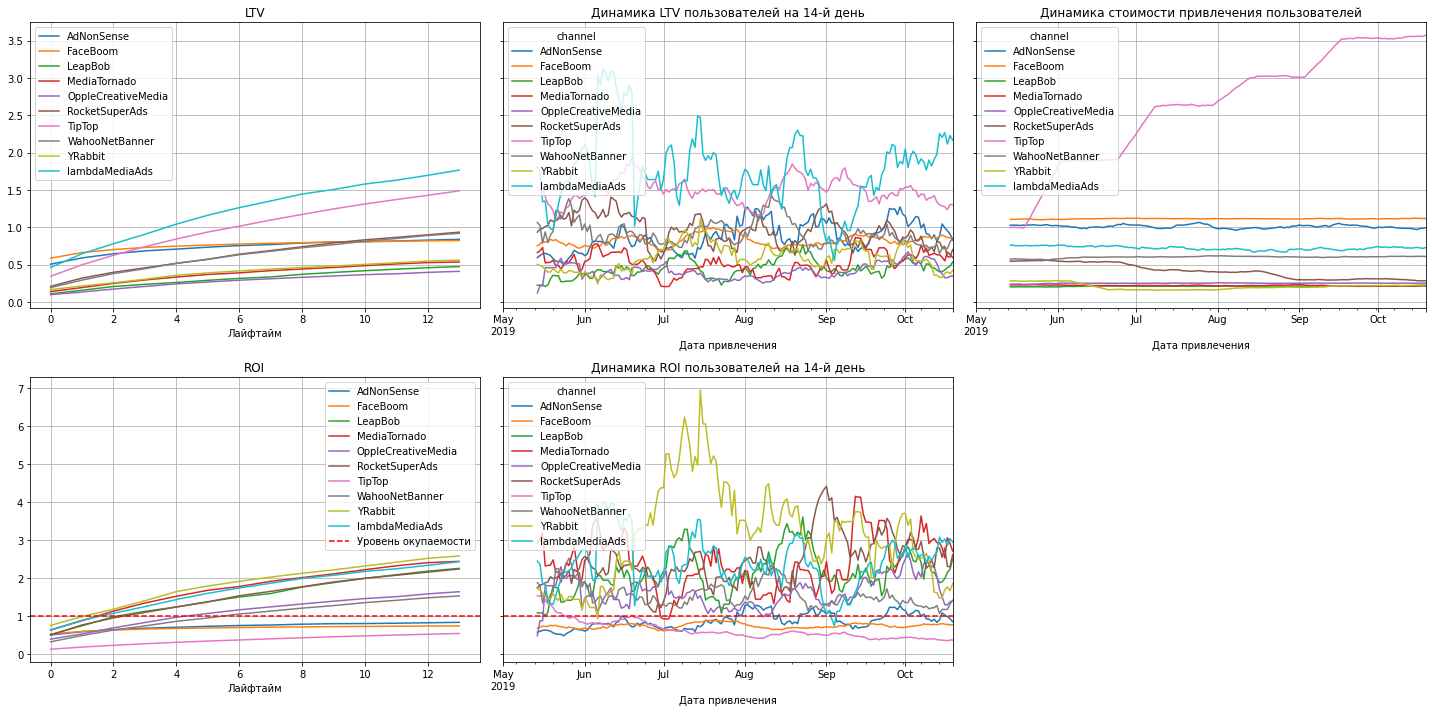

In [31]:
dimensions = ['channel']

       
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-info">
    
- У канала TipTop при наибольшей доле бюджета наблюдается резкий подъем стоимости привлечения пользователя. Также он имеет самую низкую окупаемость, примерно в 50%. Этот канал привлечения является наиболее убыточным, и его показатели и долю бюджета необходимо исправлять, либо вовсе от него отказываться.
- FaceBoom также при значительной доле бюджета не достигает окупаемости. С этим каналом необходимо провести работу, чтобы вывести на окупаемость. Проверить качество пользователей, приходящих с этих каналов
- Еще один канал AdNonSense при высоком показателе конверсии не выходит на окупаемость
- Канал YRabbit в летние месяцы показывал высокие значения ROI в первые недели. Возможно стоит уделить этому каналу более значительную часть маркетинговых расходов. Срез и график по данному каналу сделаем в конце.
    
Общие вывод: необходимо проверить качество пользователей, причины роста стоимости привлечения, доли рекламного бюджета для каналов TipTop, FaceBoom и AdNonSense. Пересмотреть бюджеты на каналы, кроме последних.
    
</div>

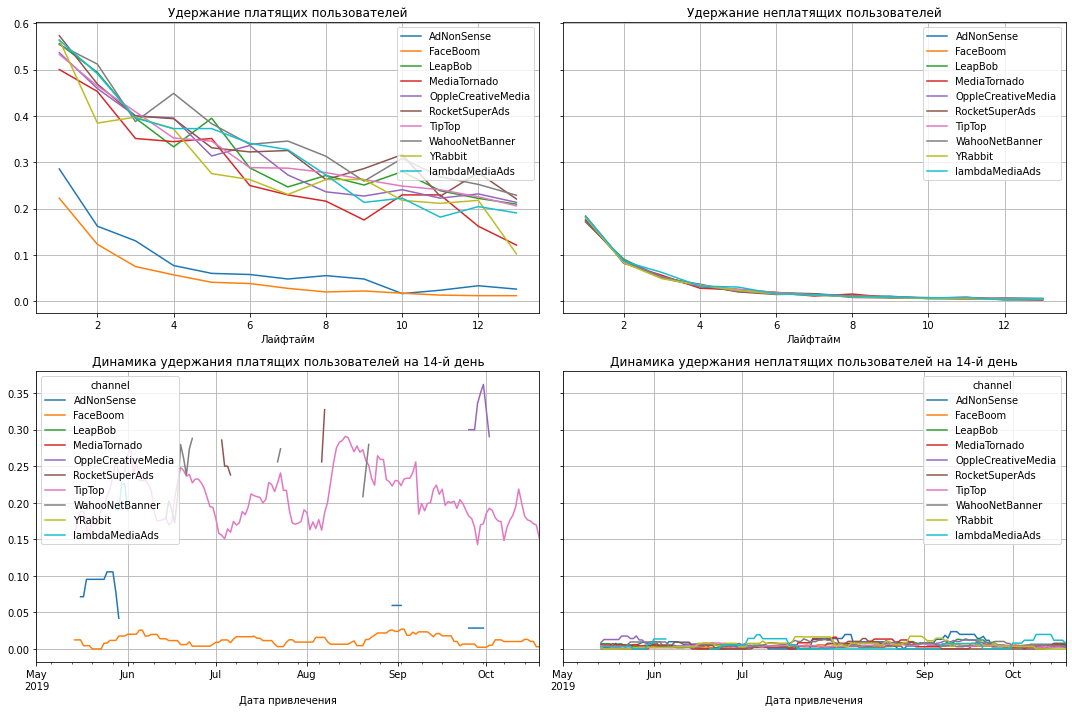

In [32]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-info">
    
- Данные подтверждают крайне низкую эффективность удержания платящих пользователей у каналов TipTop и FaceBoom
- В частности у FaceBoom платящие пользователи редко проживают 14 дней после привлечения. Из этого следует, что пользователи, пришедшие через этот канал, уходят после первого платежа в приложении. Возможно что-то не так с релевантностью рекламы.
    
Вывод: Проверить качество пользователей с канала TipTop и FaceBoom, их отзывы, а также релевантность рекламных объявлений на этих каналах.
    
</div>

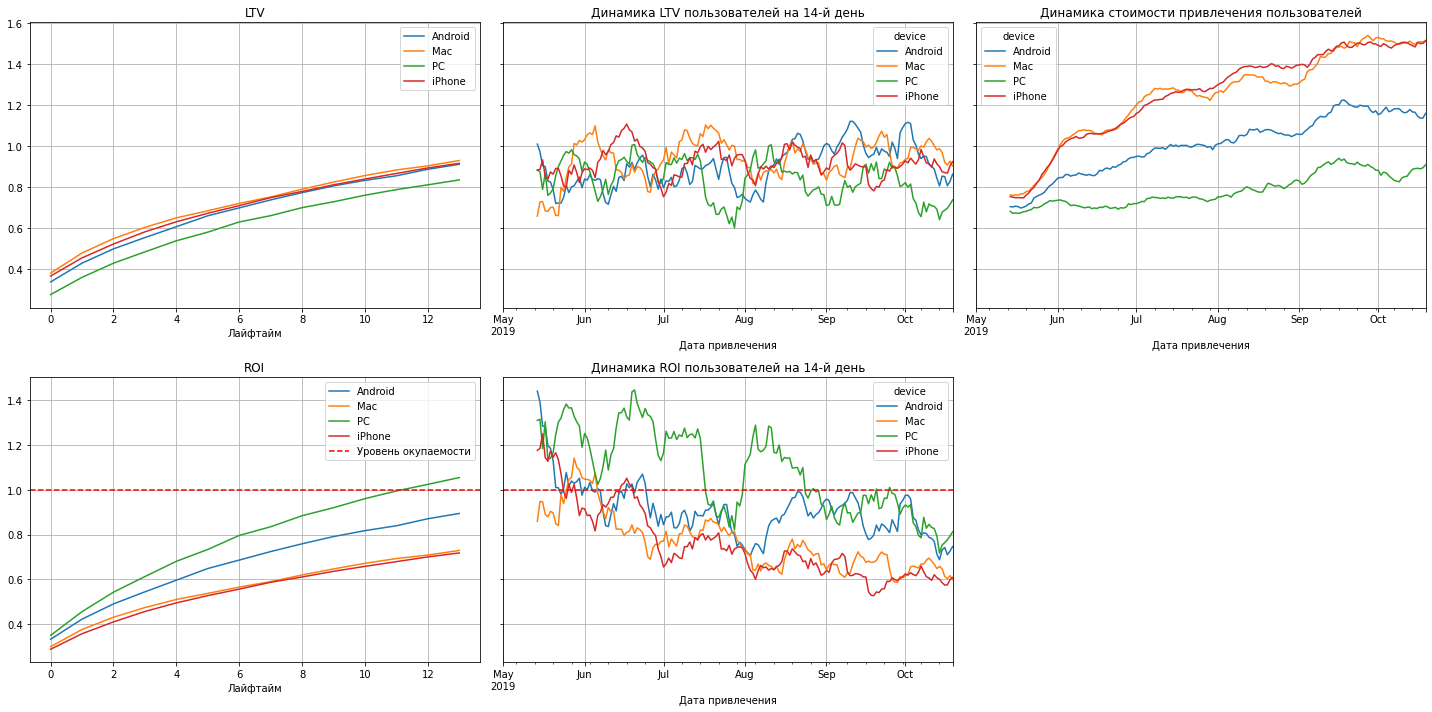

In [33]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-info">
    
- разбивка показателей окупаемости по устройствам подтверждает данные о росте стоимости привлечения на всех устройствах, в большей степени Iphone и Mac. Среди них в т.ч. большинство пользователей из США
- пользователи Iphone и Mac не выходят на окупаемость.  
- общий тренд динамики ROI на 14-й день имеет нисходящую тенденцию. И все устройства уже пробили порог окупаемости
    
</div>

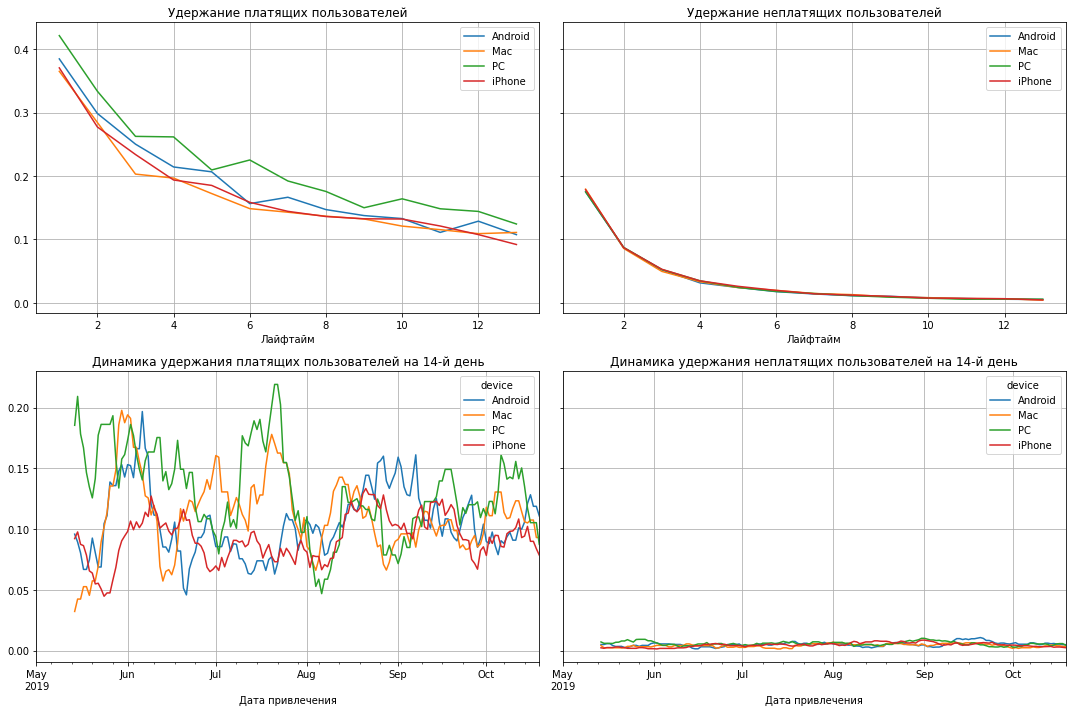

In [34]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-info">
    
- распределение по устройствам входа показывает нисходящий тренд по удержанию, но не выделяет какого-либо устройства с крайне низким показателем
    
</div>

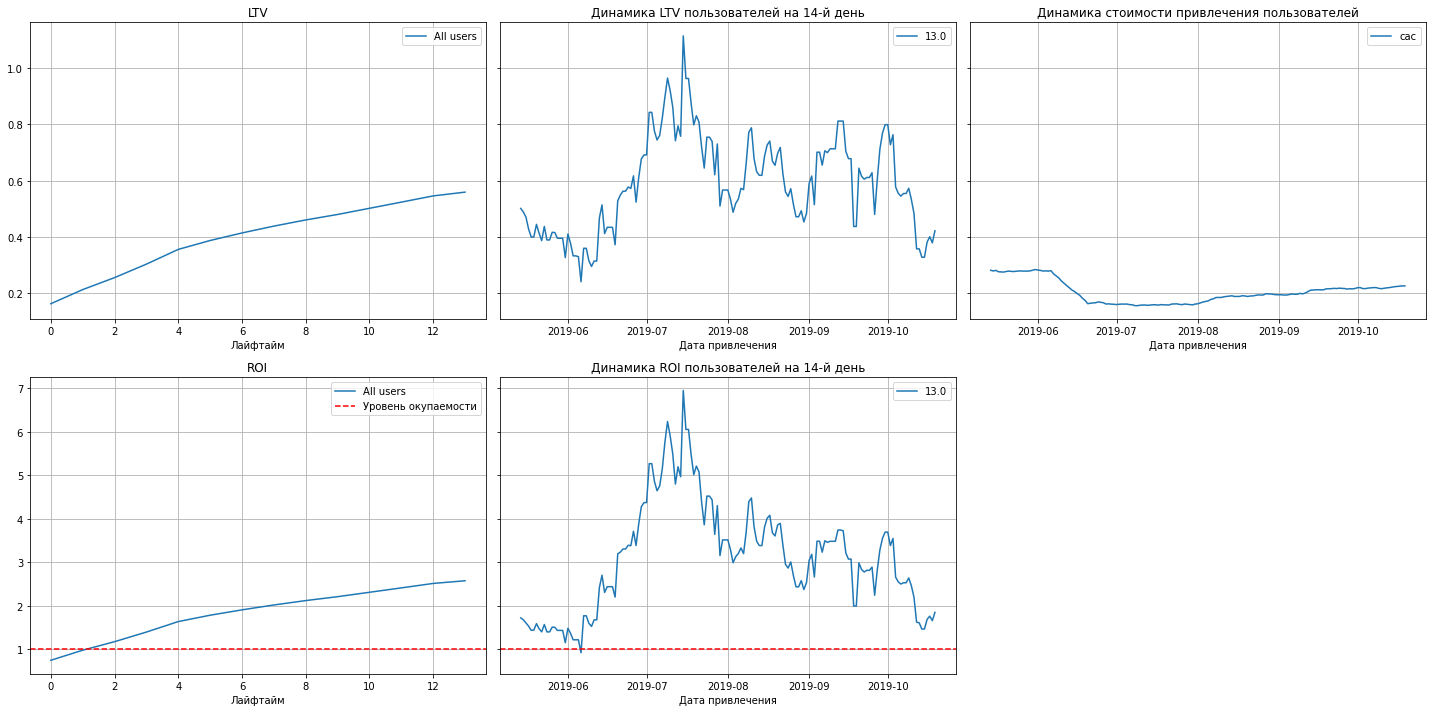

In [35]:
# сделаем срез по каналу YRabbit и посмотрим показатели окупаемости отдельно

profiles = profiles.query('channel == "YRabbit"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


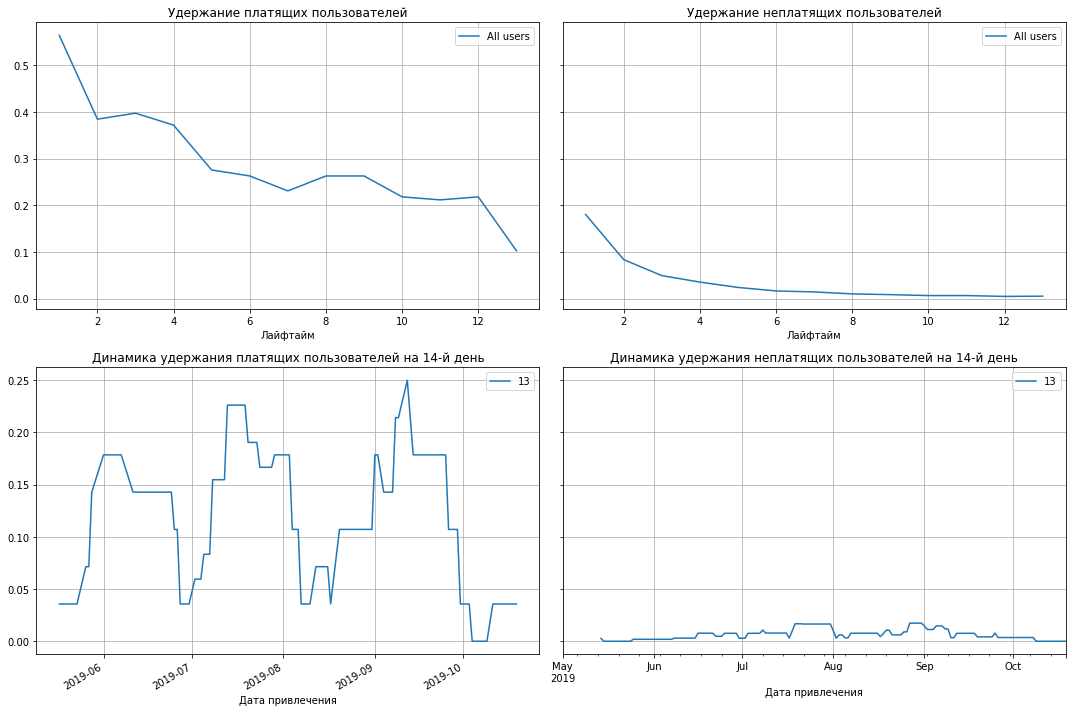

In [36]:
# смотрим удержание пользователей с YRabbit

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

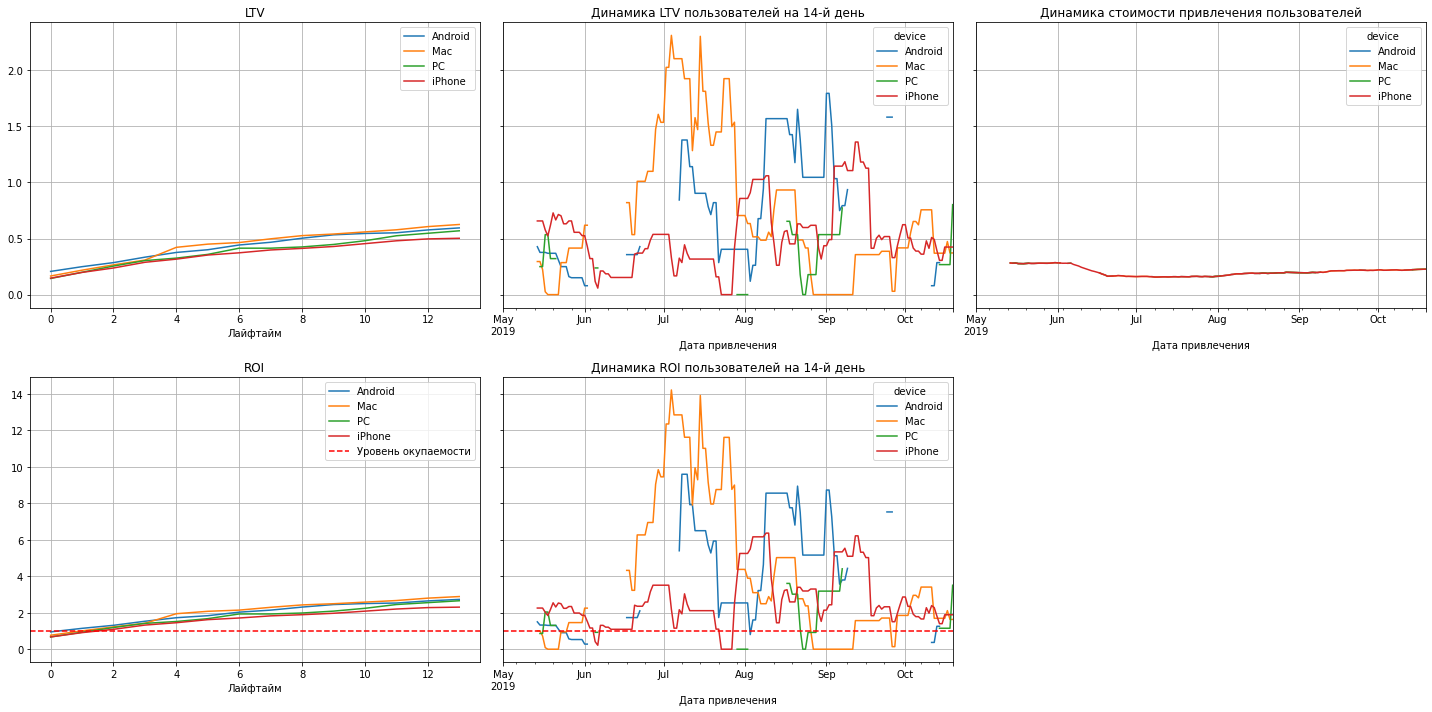

In [37]:
# смотрим окупаемость пользователей YRabbit с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Канал YRabbit обладает лучшими показателями окупаемости, доходность с одного пользователя превышает затраты в 2-3 раза. 
- Все пользователи из США, который является для компании главной проблемой. 
- По устройствам нет провалов по окупаемости

Необходимо изучить модель работы с этим каналом и по возможности перенести какие-то параметры на другие каналы с американской аудиторией. И конечно же значительно увеличить долю бюджета для данного канала.

## Общие выводы

#### - Каналы с наибольшими бюджетами и объемами привлечения TipTop и FaceBoom имеют крайне низкие показатели удержания платящих пользователей и уровень окупаемости примерно 50-60%. Что приносит основные убытки.

#### - Немалую часть платящих пользователей (около 10%) приносит органический бесплатный трафик. Но даже это не позволяет выйти в прибыль. Необходимо провести анализ контента на официальном сайте и у дистрибьюторов, в магазинах приложений. Проработать уникальное торговое предложение для повышения качества пользователей. Повысить конверсию с органического трафика в 2-3 раза, в т.ч. используя альтернативные способы продвижения продукта (тематические блоги и обзоры, продакт плейсмент и др.)

#### - Удержание в первые 2 недели после привлечения у пользователей, пришедших с FaceBoom, близка к 0. Необходимо провести тщательную ревизию этого канала привлечения, в т.ч. качество пользователей и рекламных объявлений.

#### - У канала TipTop с наибольшей долей рекламного бюджета и объемом платного трафика наблюдается аномальный рост стоимости привлечения. С этим каналом необходимо в первую очередь пересмотреть тарифы рекламной сети и возможно выбрать другую систему конверсии

#### - Необходимо изучить модель работы с каналом YRabbit и по возможности перенести какие-то параметры на другие каналы с американской аудиторией. И конечно же значительно увеличить долю бюджета для данного канала.

#### - Удорожание привлечения и качество пользователей сконцентрировано в основном в регионе США. По этому региону необходимо перенастроить всю рекламную кампанию и провести дополнительное исследование пользователей из этого региона.